<a href="https://colab.research.google.com/github/RahmanMonty/Data606Capstone/blob/main/Baltimore_Crime_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analysis

In [ ]:
import requests

response = requests.get("https://egis.baltimorecity.gov/egis/rest/services/GeoSpatialized_Tables/Part1_Crime/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import random
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [ ]:
#use for offline

import pandas as pd
df = pd.read_excel('/content/Part1_Crime_data.xlsx')
df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape
0,1.431688e+06,604046.096242,1,2021/07/03 14:32:00+00,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN
1,1.415386e+06,598803.710854,2,2021/07/03 05:21:54+00,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN
2,1.413955e+06,581387.604790,3,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN
3,1.413955e+06,581387.604790,4,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN
4,1.424268e+06,586493.057063,5,2021/07/03 14:00:00+00,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN


In [ ]:
# Use for api
# data = (response.json())
# print(data)

In [ ]:
# URL = "https://egis.baltimorecity.gov/egis/rest/services/GeoSpatialized_Tables/Part1_Crime/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
# df = pd.read_json(data)


In [ ]:
# data = pd.json_normalize(data, record_path = ['features'])
# data.head(5)

In [ ]:
# len(data)

In [ ]:
len(df)

339910

In [ ]:
# data.dtypes

In [ ]:
df["Description"].unique()

array(['LARCENY', 'SHOOTING', 'LARCENY FROM AUTO', 'HOMICIDE',
       'COMMON ASSAULT', 'AUTO THEFT', 'BURGLARY', 'AGG. ASSAULT',
       'ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'RAPE', 'ARSON',
       'ROBBERY - CARJACKING', 'ROBBERY - RESIDENCE'], dtype=object)

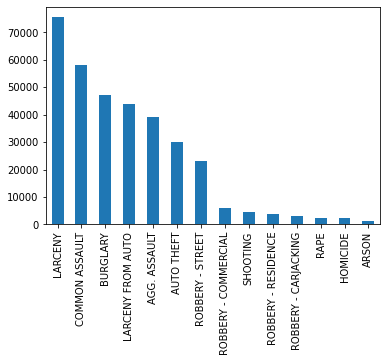

In [ ]:
df['Description'].value_counts().plot(kind='bar')

In [ ]:
df["Hour"] = pd. DatetimeIndex(df['CrimeDateTime']).hour
df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Hour
0,1.431688e+06,604046.096242,1,2021/07/03 14:32:00+00,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,14
1,1.415386e+06,598803.710854,2,2021/07/03 05:21:54+00,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,5
2,1.413955e+06,581387.604790,3,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,1
3,1.413955e+06,581387.604790,4,2021/07/03 01:37:14+00,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,1
4,1.424268e+06,586493.057063,5,2021/07/03 14:00:00+00,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,14


In [ ]:
# data['attributes.Description'].value_counts().plot(kind='bar')

In [ ]:
df['Description'].value_counts()

LARCENY                 75447
COMMON ASSAULT          58026
BURGLARY                47268
LARCENY FROM AUTO       43748
AGG. ASSAULT            39021
AUTO THEFT              29907
ROBBERY - STREET        23219
ROBBERY - COMMERCIAL     5974
SHOOTING                 4515
ROBBERY - RESIDENCE      3623
ROBBERY - CARJACKING     3185
RAPE                     2385
HOMICIDE                 2164
ARSON                    1428
Name: Description, dtype: int64

In [ ]:
#Converting Epoch datetime to normal datetime
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime']).dt.date

df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Hour
0,1.431688e+06,604046.096242,1,2021-07-03,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,14
1,1.415386e+06,598803.710854,2,2021-07-03,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,5
2,1.413955e+06,581387.604790,3,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,1
3,1.413955e+06,581387.604790,4,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,1
4,1.424268e+06,586493.057063,5,2021-07-03,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,14


In [ ]:

df['Year'] = pd. DatetimeIndex(df['CrimeDateTime']).year
df['Month'] = pd. DatetimeIndex(df['CrimeDateTime']).month
df["Hour"] = pd. DatetimeIndex(df['CrimeDateTime']).hour
df.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Hour,Year,Month
0,1.431688e+06,604046.096242,1,2021-07-03,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,0,2021,7
1,1.415386e+06,598803.710854,2,2021-07-03,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,0,2021,7
2,1.413955e+06,581387.604790,3,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7
3,1.413955e+06,581387.604790,4,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7
4,1.424268e+06,586493.057063,5,2021-07-03,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,0,2021,7


In [ ]:
df["Description"].value_counts()

LARCENY                 75447
COMMON ASSAULT          58026
BURGLARY                47268
LARCENY FROM AUTO       43748
AGG. ASSAULT            39021
AUTO THEFT              29907
ROBBERY - STREET        23219
ROBBERY - COMMERCIAL     5974
SHOOTING                 4515
ROBBERY - RESIDENCE      3623
ROBBERY - CARJACKING     3185
RAPE                     2385
HOMICIDE                 2164
ARSON                    1428
Name: Description, dtype: int64

In [ ]:
# crime_time = df.pivot_table("RowID", aggfunc = np.size, columns = "Description",
#                             index = df.index.CrimeDateTime, fill_value = 0)
# crime_time.index = pd.DatetimeIndex(crime_time.index)
# plot = crime_time.rolling(365).sum().plot(figsize = (12, 30), subplots = True,
#                                           layout = (-1, 3), sharex= False, sharey = False)

In [ ]:
# plt.figure(figsize = (11, 5))
# plt.xlabel('Year')
# plt.ylabel(df["Description"].value_counts())
# plt.show()

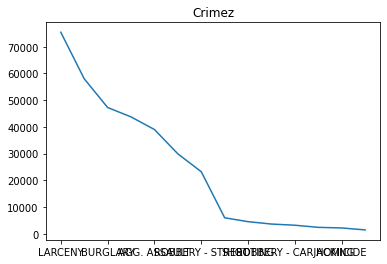

In [ ]:
df["Description"].value_counts().plot(kind = "line", title = "Crimez")

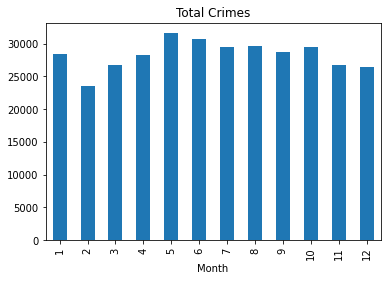

In [ ]:
df.groupby(("Month")).size().plot(kind = 'bar', title = "Total Crimes")


In [ ]:
df = df[df["Year"] > 2014]

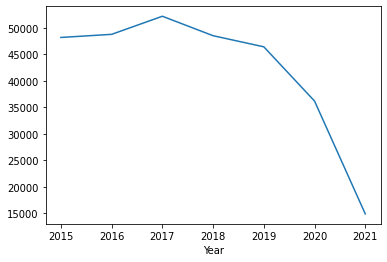

In [ ]:
# It appears that crimes have lowered from the years 2017 to 2020. 2021 is still in progress and is not fully representitive of the year.
df.groupby("Year").size().plot(kind = "line")

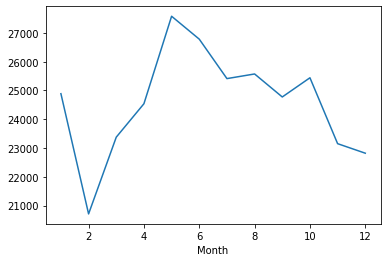

In [ ]:
df.groupby("Month").size().plot(kind = "line")

###Let's focus on the five most frequent crimes
######LARCENY                 75447
######COMMON ASSAULT          58026
######BURGLARY                47268
######LARCENY FROM AUTO       43748
######AGG. ASSAULT            39021
######AUTO THEFT              29907
######ROBBERY - STREET        23219
######ROBBERY - COMMERCIAL     5974
######SHOOTING                 4515
######ROBBERY - RESIDENCE      3623
######ROBBERY - CARJACKING     3185
######RAPE                     2385
######HOMICIDE                 2164
######ARSON                    1428

In [ ]:
Larceny = df[df.Description.str.contains("LARCENY")]
Common_Assault = df[df.Description.str.contains("COMMON ASSAULT")]
Burglary = df[df.Description.str.contains("BURGLARY")]
Larceny_From_Auto = df[df.Description.str.contains("LARCENY FROM AUTO")]
Agg_Assault = df[df.Description.str.contains("AGG. ASSAULT")]

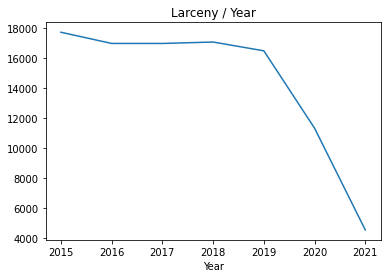

In [ ]:
Larceny.groupby("Year").size().plot(kind = "line", title = "Larceny / Year")

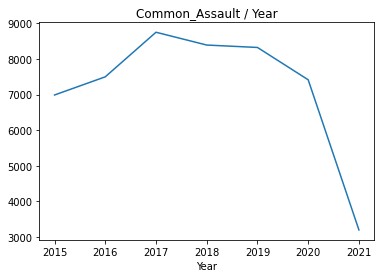

In [ ]:
Common_Assault.groupby("Year").size().plot(kind = "line", title = "Common_Assault / Year")

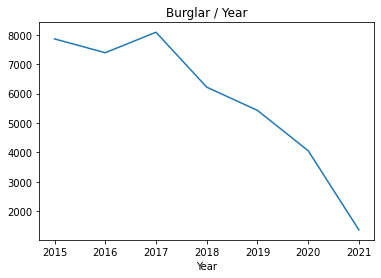

In [ ]:
Burglary.groupby("Year").size().plot(kind = "line", title = "Burglar / Year")

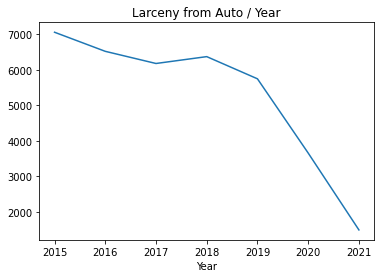

In [ ]:
Larceny_From_Auto.groupby("Year").size().plot(kind = "line", title = "Larceny from Auto / Year")

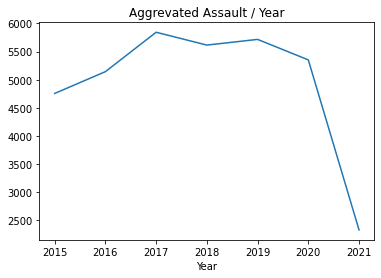

In [ ]:
Agg_Assault.groupby("Year").size().plot(kind = "line", title = "Aggrevated Assault / Year")

District of crimes


Text(0.5, 1.0, 'Larceny')

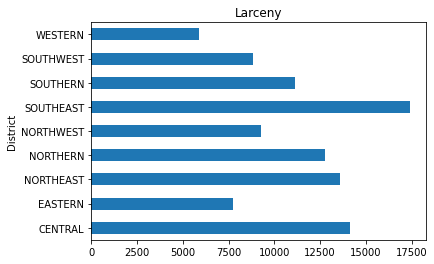

In [ ]:
Larceny.groupby("District").size().plot(kind = "barh")
plt.title("Larceny")

Text(0.5, 1.0, 'Common Assault')

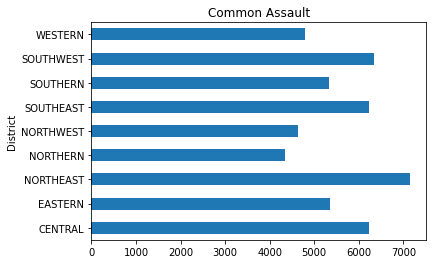

In [ ]:
Common_Assault.groupby("District").size().plot(kind = "barh")
plt.title("Common Assault")

Text(0.5, 1.0, 'Burglary')

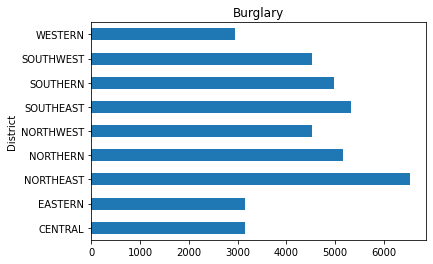

In [ ]:
Burglary.groupby("District").size().plot(kind = "barh")
plt.title("Burglary")

Text(0.5, 1.0, 'Larceny From Auto')

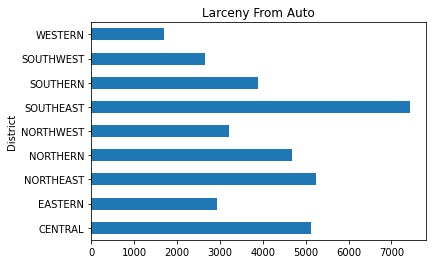

In [ ]:
Larceny_From_Auto.groupby("District").size().plot(kind = "barh")
plt.title("Larceny From Auto")

Text(0.5, 1.0, 'Aggrevated Assault')

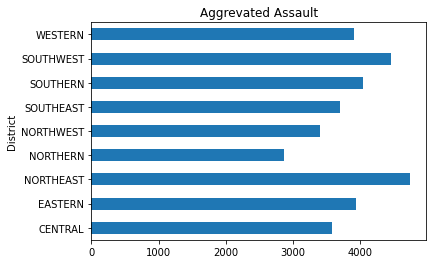

In [ ]:
Agg_Assault.groupby("District").size().plot(kind = "barh")
plt.title("Aggrevated Assault")

In [ ]:
# larceny.groupby(“STREET”).size().sort_values(ascending = False)

### Exploratory Data Analysis Geo

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-1s3ieoca
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-1s3ieoca
  Created wheel for geopandas: filename=geopandas-0.9.0+46.g7997837-py2.py3-none-any.whl size=997342 sha256=39ec4ab0913cd5278b355f50e0c951d5a2b025919d25885b31df32cfd99fe28a
  Stored in directory: /tmp/pip-ephem-wheel-cache-tuzodt5m/wheels/91/24/71/376c9c67192694168352

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
Baltimore_Map = gpd.read_file("/content/Maryland_Baltimore_City_Neighborhoods.zip")
Baltimore_Map.head(5)

,OBJECTID,NBRDESC,ACRES,LABEL,COLOR_2,geometry
0,1,ABELL,46.710432,Abell,2,"POLYGON ((1422345.337 603620.765, 1422192.136 ..."
1,2,ALLENDALE,260.023864,Allendale,2,"POLYGON ((1404989.665 592042.050, 1404989.913 ..."
2,3,ARCADIA,144.678075,Arcadia,2,"POLYGON ((1434376.830 608229.661, 1434486.755 ..."
3,4,ARLINGTON,115.584689,Arlington,5,"POLYGON ((1401059.486 612450.588, 1401004.764 ..."
4,5,ARMISTEAD GARDENS,302.585653,Armistead Gardens,2,"POLYGON ((1437179.460 597502.829, 1437145.202 ..."


In [ ]:
#code from tyler

# mapfile = gpd.read_file('your_shape_file.shp')
# crs = {'init' : 'epsg:4326'}
# mapfile= mapfile.to_crs(crs=crs) 


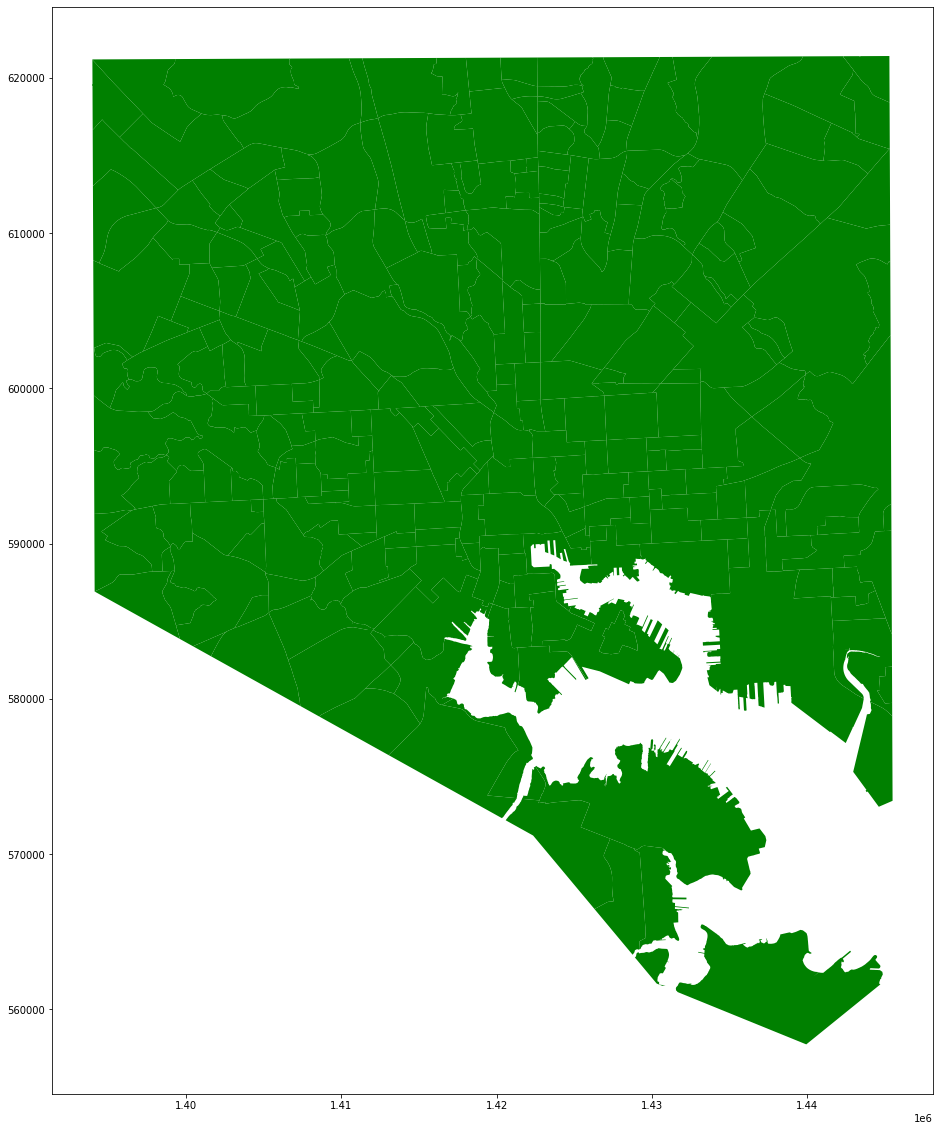

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
Baltimore_Map.plot(ax = ax, color = "green")

In [ ]:
crs = {'init' : 'epsg:4326'}
# crs = {'type': 'EPSG', 'properties': {'code': 102671}}


In [ ]:
geometry = [Point(xy) for xy in zip (df["Longitude"], df["Latitude"])]
len(geometry)

295062

In [ ]:
geo = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Hour,Year,Month,geometry
0,1.431688e+06,604046.096242,1,2021-07-03,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,0,2021,7,POINT (-76.57810 39.32450)
1,1.415386e+06,598803.710854,2,2021-07-03,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.63580 39.31030)
2,1.413955e+06,581387.604790,3,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.64110 39.26250)
3,1.413955e+06,581387.604790,4,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.64110 39.26250)
4,1.424268e+06,586493.057063,5,2021-07-03,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,0,2021,7,POINT (-76.60460 39.27640)


In [ ]:
geo.count()

X                  294605
Y                  294605
RowID              295062
CrimeDateTime      295062
CrimeCode          295062
Location           293401
Description        295062
Inside_Outside     251865
Weapon              65949
Post               294150
District           294150
Neighborhood       294133
Latitude           294605
Longitude          294605
GeoLocation        295062
Premise            251727
VRIName             35308
Total_Incidents    295062
Shape                   0
Hour               295062
Year               295062
Month              295062
geometry           295062
dtype: int64

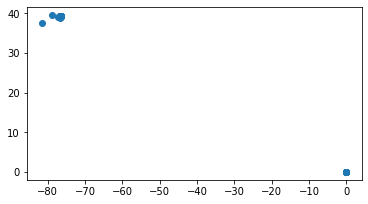

In [ ]:
geo.plot()


In [ ]:
geo = geo[geo["Latitude"] != 0]
geo = geo[geo["Longitude"] != 0]
geo = geo[geo["Longitude"] >= -77]
geo = geo[geo["Latitude"] >= 39]
geo["Latitude"].dropna()
geo["Longitude"].dropna()
geo.head()

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents,Shape,Hour,Year,Month,geometry
0,1.431688e+06,604046.096242,1,2021-07-03,6E,3300 RICHMOND AVE,LARCENY,NaN,NaN,432,NORTHEAST,BELAIR-EDISON,39.3245,-76.5781,"(39.3245,-76.5781)",NaN,NaN,1,NaN,0,2021,7,POINT (-76.57810 39.32450)
1,1.415386e+06,598803.710854,2,2021-07-03,9S,1100 W NORTH AVE,SHOOTING,Outside,FIREARM,133,CENTRAL,DRUID HEIGHTS,39.3103,-76.6358,"(39.3103,-76.6358)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.63580 39.31030)
2,1.413955e+06,581387.604790,3,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.64110 39.26250)
3,1.413955e+06,581387.604790,4,2021-07-03,9S,2400 ANNOR CT,SHOOTING,Outside,FIREARM,921,SOUTHERN,WESTPORT,39.2625,-76.6411,"(39.2625,-76.6411)",STREET,NaN,1,NaN,0,2021,7,POINT (-76.64110 39.26250)
4,1.424268e+06,586493.057063,5,2021-07-03,6E,500 HARBORVIEW DR,LARCENY,I,NaN,943,SOUTHERN,INNER HARBOR,39.2764,-76.6046,"(39.2764,-76.6046)",PARKING LOT-INSIDE,NaN,1,NaN,0,2021,7,POINT (-76.60460 39.27640)


In [ ]:
geo.count()

X                  294459
Y                  294459
RowID              294459
CrimeDateTime      294459
CrimeCode          294459
Location           292949
Description        294459
Inside_Outside     251402
Weapon              65796
Post               294150
District           294150
Neighborhood       294133
Latitude           294459
Longitude          294459
GeoLocation        294459
Premise            251264
VRIName             35249
Total_Incidents    294459
Shape                   0
Hour               294459
Year               294459
Month              294459
geometry           294459
dtype: int64

In [ ]:
#plotly express try this as new library if geo doesnt work

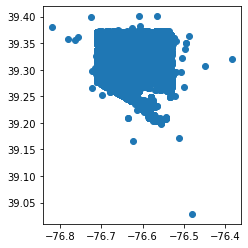

In [ ]:
geo.plot()

In [ ]:
%matplotlib inline
!pip install descartes

TypeError: ignored

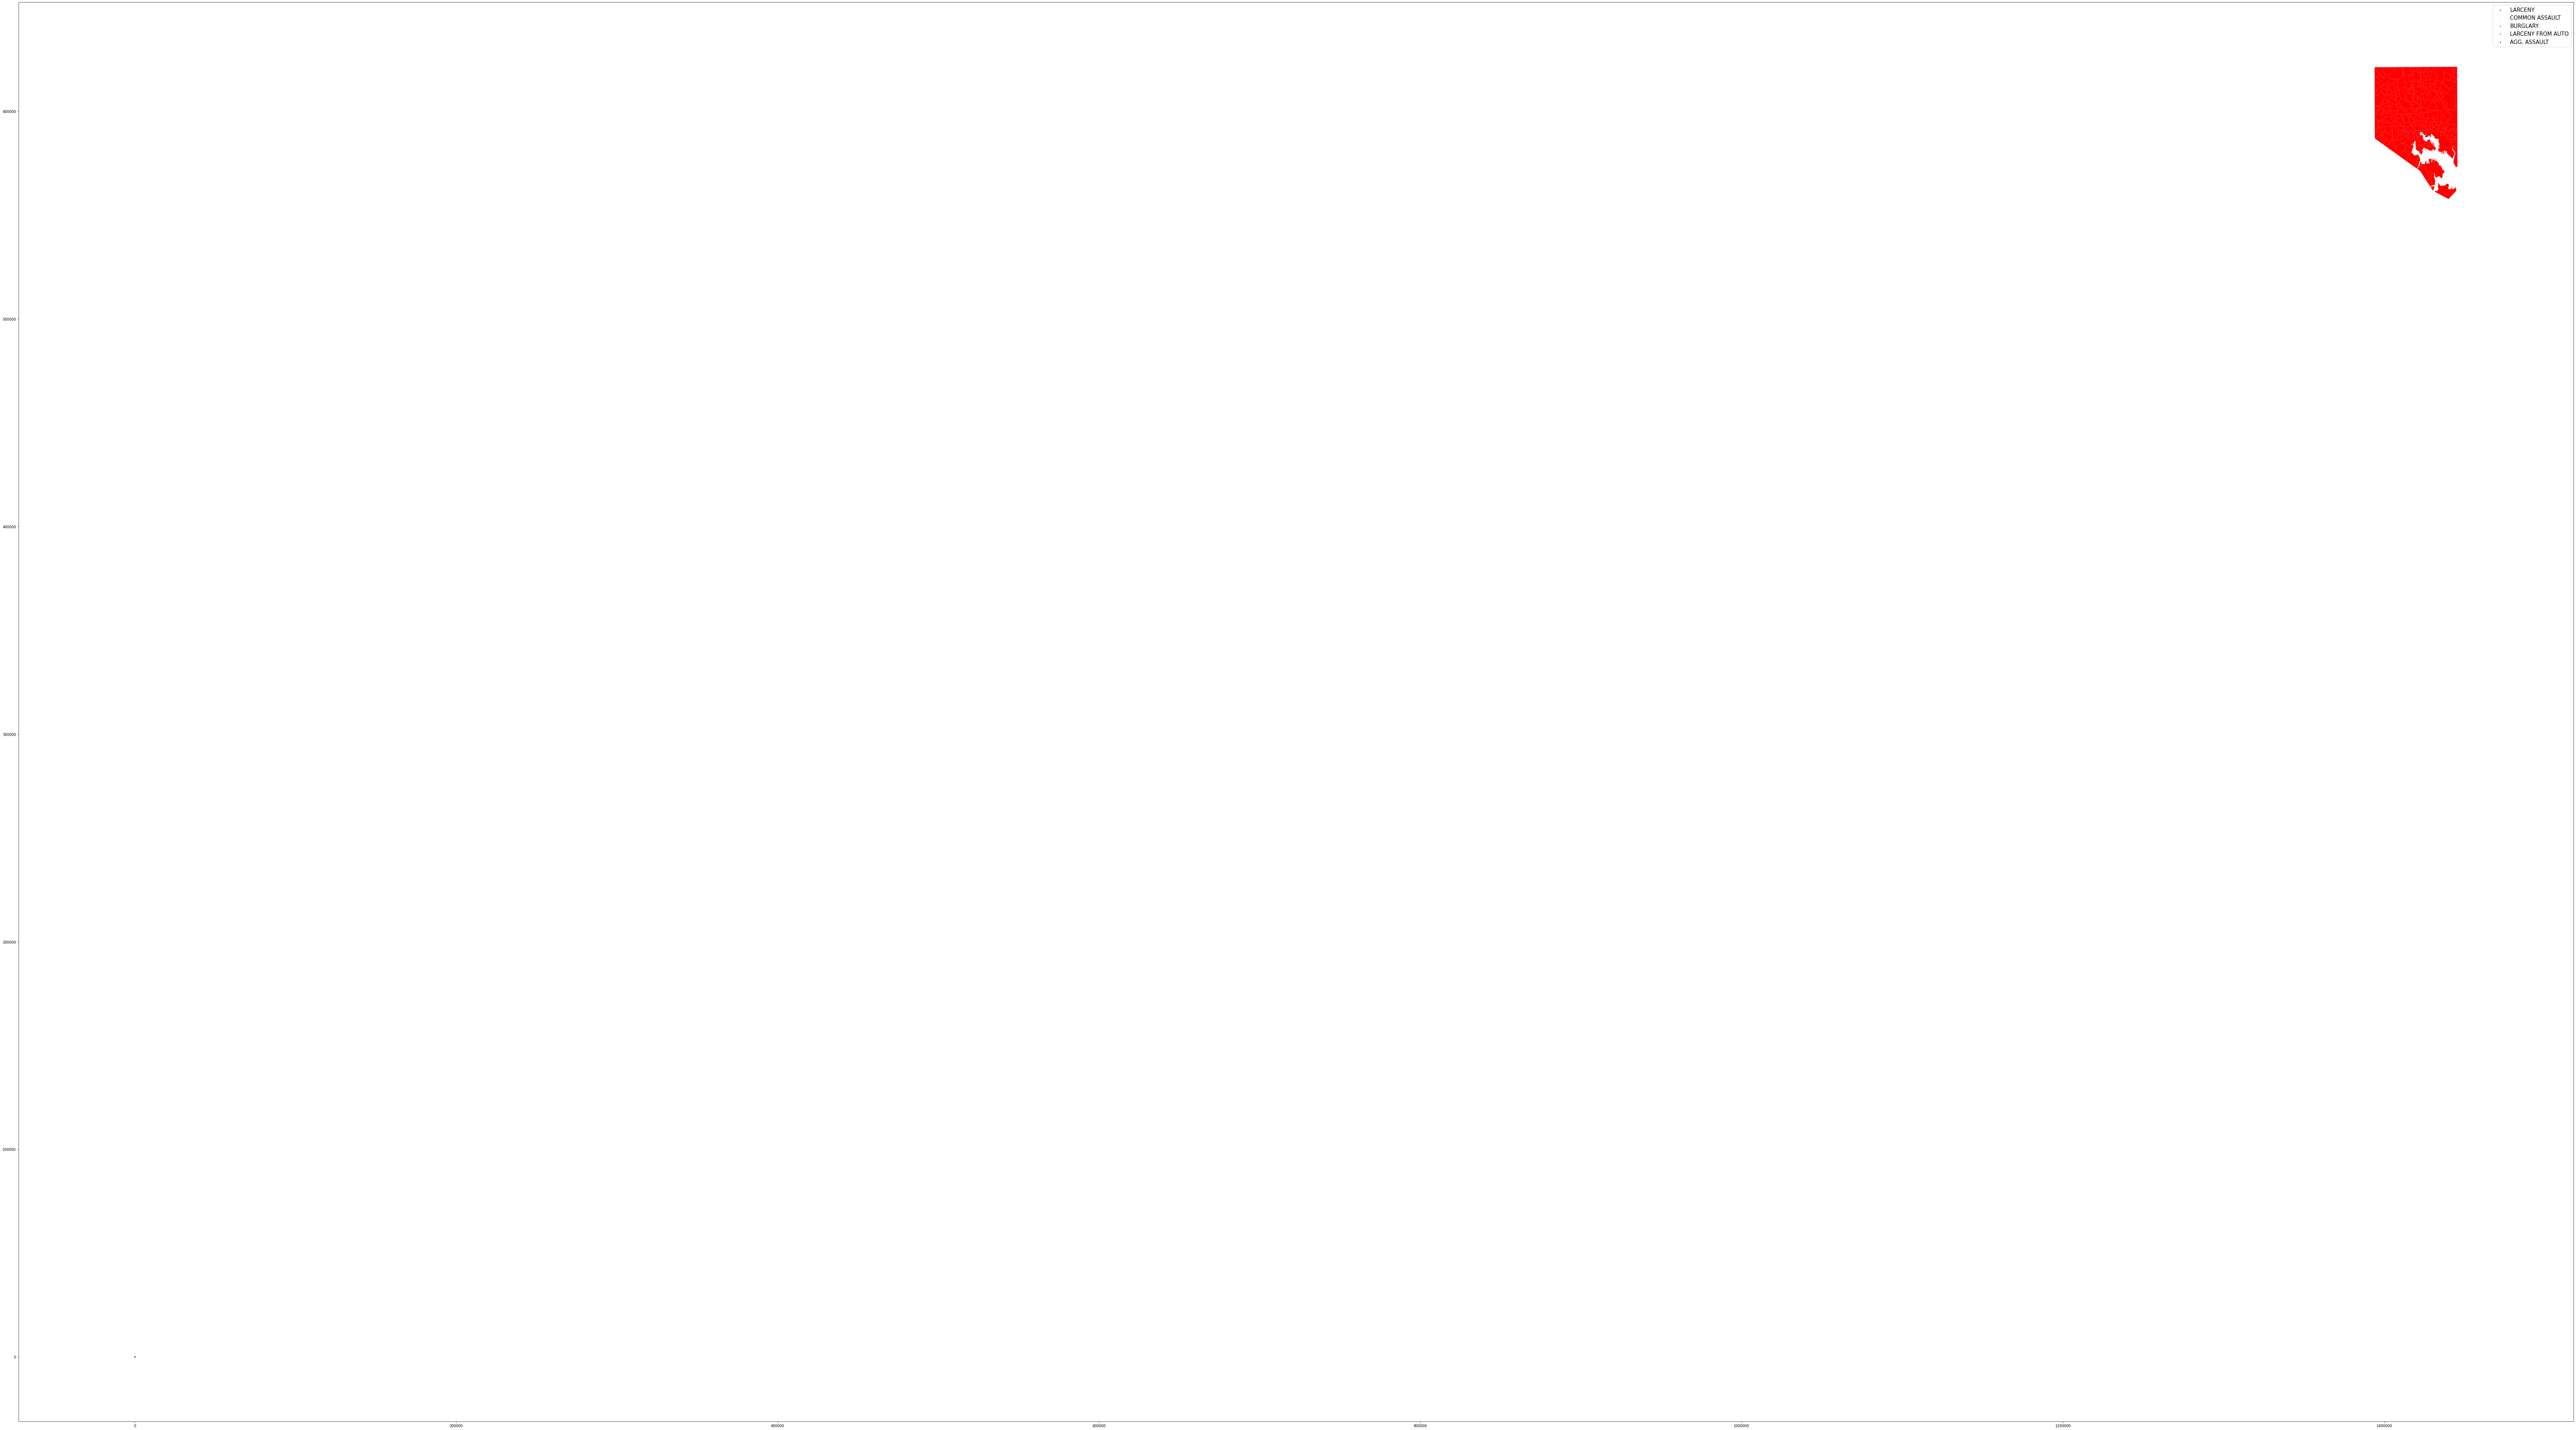

In [ ]:
fig, ax = plt.subplots(1, figsize = (100, 100), constrained_layout = True)
ax.ticklabel_format(useOffset=False, style = "plain")
Baltimore_Map.plot(ax = ax, alpha = 1, color = "red")
geo[geo["Description"] == "LARCENY"].plot(ax = ax, markersize = 3, color = "blue", marker = "o", label = "LARCENY")
geo[geo["Description"] == "COMMON ASSAULT"].plot(ax = ax, markersize = 3, color = "yellow", marker = "o", label = "COMMON ASSAULT")
geo[geo["Description"] == "BURGLARY"].plot(ax = ax, markersize = 3, color = "green", marker = "o", label = "BURGLARY")
geo[geo["Description"] == "LARCENY FROM AUTO"].plot(ax = ax, markersize = 3, color = "red", marker = "o", label = "LARCENY FROM AUTO")
geo[geo["Description"] == "AGG. ASSAULT"].plot(ax = ax, markersize = 3, color = "black", marker = "o", label = "AGG. ASSAULT")
plt.legend(prop = {'size' : 15})
fig.align_ylabels(ax[:, 1])
plt.show()
plt.title("Baltimore shapefile")

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 20), constrained_layout = True)
ax.ticklabel_format(useOffset=False, style = "plain")
Baltimore_Map.plot(ax = ax, alpha = .9, color = "red")
geo[geo["Description"] == "LARCENY"].plot(ax = ax, markersize = 3, color = "blue", marker = "x", label = "Larceny")
geo[geo["Description"] == "COMMON ASSAULT"].plot(ax = ax, markersize = 3, color = "yellow", marker = "x", label = "COMMON ASSAULT")
geo[geo["Description"] == "BURGLARY"].plot(ax = ax, markersize = 3, color = "green", marker = "x", label = "BURGLARY")
geo[geo["Description"] == "LARCENY FROM AUTO"].plot(ax = ax, markersize = 3, color = "red", marker = "x", label = "LARCENY FROM AUTO")
geo[geo["Description"] == "AGG. ASSAULT"].plot(ax = ax, markersize = 3, color = "black", marker = "x", label = "AGG. ASSAULT")
plt.legend(prop = {'size' : 15})
plt.axis([1375000,1600000,550000,630000])
plt.title("Baltimore shapefile")

Different Attempt

In [ ]:
merged_geo = df.set_index("GeoLocation").join(geo)

In [ ]:
#code from tyler

mapfile = gpd.read_file('/content/Maryland_Baltimore_City_Neighborhoods.zip')
crs = {'init' : 'epsg:4326'}
mapfile= mapfile.to_crs(crs=crs) 
fig, ax = plt.subplots(figsize = (15,15))
Baltimore_Map.plot(ax = ax, alpha = .9, color = "white")
geo[geo["Description"] == "LARCENY"].plot(ax = ax, markersize = 3, color = "blue", marker = "x", label = "Larceny")
geo[geo["Description"] == "COMMON ASSAULT"].plot(ax = ax, markersize = 3, color = "yellow", marker = "x", label = "COMMON ASSAULT")
geo[geo["Description"] == "BURGLARY"].plot(ax = ax, markersize = 3, color = "green", marker = "x", label = "BURGLARY")
geo[geo["Description"] == "LARCENY FROM AUTO"].plot(ax = ax, markersize = 3, color = "red", marker = "x", label = "LARCENY FROM AUTO")
geo[geo["Description"] == "AGG. ASSAULT"].plot(ax = ax, markersize = 3, color = "black", marker = "x", label = "AGG. ASSAULT")

### Model


### Now we will return to our crime dataframe to begin our machine learning model process#

In [ ]:
# For our model let's drop redundant crime descriptions
# For example Roberry - street, robbery -  commercial,
# robbery - residence, robbery - carjacking can all be burglary

df['Description'].value_counts()

In [ ]:
geo.count()

In [ ]:
df.head()

In [ ]:
df_model = df.drop(["X", "Y", "RowID", "Total_Incidents", 
                    "Shape", "Hour", "Year", "Month", "geometry", "GeoLocation",
                    "VRIName", "Location"], axis = 1)
df_model.head()

In [ ]:
df_model = df_model[df_model["CrimeCode"].notna()]

df_model = df_model[df_model["Description"].notna()]
df_model = df_model[df_model["Inside_Outside"].notna()]
df_model = df_model[df_model["Weapon"].notna()]
df_model = df_model[df_model["Post"].notna()]
df_model = df_model[df_model["District"].notna()]
df_model = df_model[df_model["Neighborhood"].notna()]
df_model = df_model[df_model["Latitude"].notna()]
df_model = df_model[df_model["Longitude"].notna()]
df_model = df_model[df_model["Premise"].notna()]


df_model.head()

In [ ]:
#Changing non numeric values into label encoded numeric values

label_encoder = preprocessing.LabelEncoder()
df_model["CrimeDateTime"] = label_encoder.fit_transform(df_model["CrimeDateTime"])
df_model["CrimeCode"] = label_encoder.fit_transform(df_model["CrimeCode"])
df_model["Description"] = label_encoder.fit_transform(df_model["Description"])
df_model["Inside_Outside"] = label_encoder.fit_transform(df_model["Inside_Outside"])
df_model["Weapon"] = label_encoder.fit_transform(df_model["Weapon"])
df_model["District"] = label_encoder.fit_transform(df_model["District"])
df_model["Neighborhood"] = label_encoder.fit_transform(df_model["Neighborhood"])
df_model["Premise"] = label_encoder.fit_transform(df_model["Premise"])
df_model.head(5)

In [ ]:
#Making date time to numeric

df_model['CrimeDateTime'] = df_model['CrimeDateTime'].apply(lambda x: df_model["CrimeDateTime"])
# (lambda x: x==data4.max()['Gift_Trans__No_'])

#  df_model['CrimeDateTime'] = df_model['CrimeDateTime'].apply(pd.to_numeric, errors='coerce')
df_model.head()

In [ ]:
labels = np.array(df_model['CrimeCode'])
features = df_model.drop('CrimeCode', axis = 1)
feature_list = list(features.columns)
features = np.array(features)
print(labels)
print(feature_list)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4)
rf.fit(train_features, train_labels);